In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train.shape

(1460, 81)

In [5]:
pd.set_option('display.max_rows',90)
train.isnull().sum()

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType          8
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

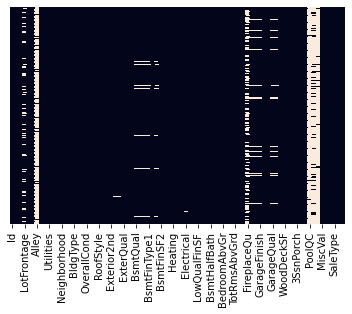

In [6]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

In [7]:
train.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [8]:
train['LotFrontage'].mean()


70.04995836802665

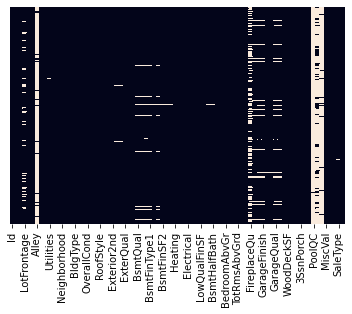

In [9]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [35]:
test.isnull().sum()


Id                  0
MSSubClass          0
MSZoning            4
LotFrontage         0
LotArea             0
Street              0
LotShape            0
LandContour         0
Utilities           2
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         1
Exterior2nd         1
MasVnrType         16
MasVnrArea         15
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           44
BsmtCond            0
BsmtExposure        0
BsmtFinType1        0
BsmtFinSF1          1
BsmtFinType2        0
BsmtFinSF2          1
BsmtUnfSF           1
TotalBsmtSF         1
Heating             0
HeatingQC           0
CentralAir          0
Electrical          0
1stFlrSF            0
2ndFlrSF            0
LowQualFinSF        0
GrLivArea 

In [12]:
train['LotFrontage'] = train['LotFrontage'].fillna(train['LotFrontage'].mean())
test['LotFrontage'] = test['LotFrontage'].fillna(test['LotFrontage'].mean())

In [16]:
train.drop(['Alley'],axis=1,inplace=True)
test.drop(['Alley'],axis=1,inplace=True)

In [27]:
#train['BsmtFinType1'].value_counts()
#train['BsmtCond'].value_counts()
#train['BsmtExposure'].value_counts()
#train['BsmtFinType1'].value_counts()
train['FireplaceQu'].value_counts()



Gd    380
TA    313
Fa     33
Ex     24
Po     20
Name: FireplaceQu, dtype: int64

In [29]:
#train data remove null values
train['BsmtFinType1'] = train['BsmtFinType1'].fillna(train['BsmtFinType1'].mode()[0])
train['BsmtCond'] = train['BsmtCond'].fillna(train['BsmtCond'].mode()[0])
train['BsmtExposure'] = train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
train['BsmtFinType1'] = train['BsmtExposure'].fillna(train['BsmtExposure'].mode()[0])
train['BsmtFinType2'] = train['BsmtFinType2'].fillna(train['BsmtFinType2'].mode()[0])
train['FireplaceQu'] = train['FireplaceQu'].fillna(train['FireplaceQu'].mode()[0])
train['GarageType'] = train['GarageType'].fillna(train['GarageType'].mode()[0])
train['GarageYrBlt'] = train['GarageYrBlt'].fillna(train['GarageYrBlt'].mean())
train['GarageFinish'] = train['GarageFinish'].fillna(train['GarageFinish'].mode()[0])
train['GarageQual'] = train['GarageQual'].fillna(train['GarageQual'].mode()[0])
train['GarageCond'] = train['GarageCond'].fillna(train['GarageCond'].mode()[0])

#test data remove null values
test['BsmtFinType1'] = test['BsmtFinType1'].fillna(test['BsmtFinType1'].mode()[0])
test['BsmtCond'] = test['BsmtCond'].fillna(test['BsmtCond'].mode()[0])
test['BsmtExposure'] = test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])
test['BsmtFinType1'] = test['BsmtExposure'].fillna(test['BsmtExposure'].mode()[0])
test['BsmtFinType2'] = test['BsmtFinType2'].fillna(test['BsmtFinType2'].mode()[0])
test['FireplaceQu'] = test['FireplaceQu'].fillna(test['FireplaceQu'].mode()[0])
test['GarageType'] = test['GarageType'].fillna(test['GarageType'].mode()[0])
test['GarageYrBlt'] = test['GarageYrBlt'].fillna(test['GarageYrBlt'].mean())
test['GarageFinish'] = test['GarageFinish'].fillna(test['GarageFinish'].mode()[0])
test['GarageQual'] = test['GarageQual'].fillna(test['GarageQual'].mode()[0])
test['GarageCond'] = test['GarageCond'].fillna(test['GarageCond'].mode()[0])

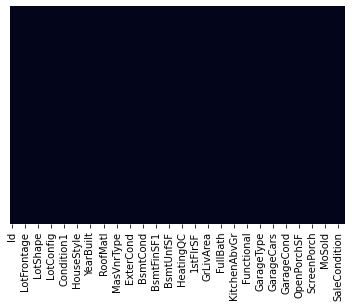

In [60]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False)

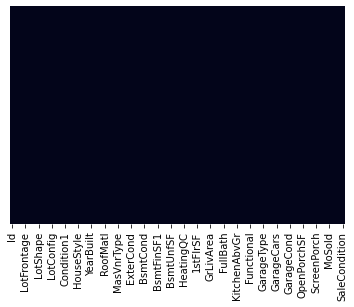

In [59]:
sns.heatmap(test.isnull(),yticklabels=False,cbar=False)

In [36]:
#drop columns where more than 50% of data are null
train.drop(['Fence'],axis=1,inplace=True)
test.drop(['Fence'],axis=1,inplace=True)

KeyError: "['Fence'] not found in axis"

In [37]:
#drop columns where more than 50% of data are null
train.drop(['PoolQC'],axis=1,inplace=True)
test.drop(['PoolQC'],axis=1,inplace=True)

train.drop(['MiscFeature'],axis=1,inplace=True)
test.drop(['MiscFeature'],axis=1,inplace=True)

In [411]:
test.isnull().sum()

Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
Street           0
LotShape         0
LandContour      0
Utilities        0
LotConfig        0
LandSlope        0
Neighborhood     0
Condition1       0
Condition2       0
BldgType         0
HouseStyle       0
OverallQual      0
OverallCond      0
YearBuilt        0
YearRemodAdd     0
RoofStyle        0
RoofMatl         0
Exterior1st      0
Exterior2nd      0
MasVnrType       0
MasVnrArea       0
ExterQual        0
ExterCond        0
Foundation       0
BsmtQual         0
BsmtCond         0
BsmtExposure     0
BsmtFinType1     0
BsmtFinSF1       0
BsmtFinType2     0
BsmtFinSF2       0
BsmtUnfSF        0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
Electrical       0
1stFlrSF         0
2ndFlrSF         0
LowQualFinSF     0
GrLivArea        0
BsmtFullBath     0
BsmtHalfBath     0
FullBath         0
HalfBath         0
BedroomAbvGr     0
KitchenAbvGr     0
KitchenQual 

In [43]:
#for categories columns fill in the missing values with mode
train['BsmtQual'] = train['BsmtQual'].fillna(train['BsmtQual'].mode()[0])
test['BsmtQual'] = test['BsmtQual'].fillna(test['BsmtQual'].mode()[0])

train['MasVnrType'] = train['MasVnrType'].fillna(train['MasVnrType'].mode()[0])
test['MasVnrType'] = test['MasVnrType'].fillna(test['MasVnrType'].mode()[0])

train['MasVnrArea'] = train['MasVnrArea'].fillna(train['MasVnrArea'].mean())
test['MasVnrArea'] = test['MasVnrArea'].fillna(test['MasVnrArea'].mean())


In [56]:

train.shape

(1459, 77)

In [52]:
# delete rows with null values
train.dropna(inplace=True)
test.dropna(inplace=True)

In [299]:
train1 = train.copy()
test1 = test.copy()

In [300]:
#delete Id column as it does not provide any meaningfull information
train1.drop(['Id'],axis=1,inplace=True)
test1.drop(['Id'],axis=1,inplace=True)

In [301]:
test1.to_csv('formulatedtest.csv',index=False)

In [302]:
test1 = pd.read_csv('formulatedtest.csv')

In [303]:
test1.shape


(1447, 75)

In [304]:
train1.shape

(1459, 76)

In [185]:
train1.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond',
       'PavedDrive', 'WoodDeckSF'

In [305]:
#concatenate rowise
#we concatenate both test and train because there may be some extra categories in test which are not there in 'train'
#and we do binary encoding on only 'train' data then columns for the values which are only on 'test' will not be created
final_df = pd.concat([train1,test1],axis=0)

In [306]:
final_df.shape


(2906, 76)

In [255]:
#function to get categories from the final_df 
def getCategories(df):
    categories = []
    for col, coltype in df.dtypes.iteritems():
        if coltype == 'object':
            categories.append(col)
    return categories
        
    

In [256]:
categories = getCategories(final_df)

In [258]:
len(categories)



39

In [307]:
final_df1 = final_df.copy()

In [308]:
final_df1.shape

(2906, 76)

In [245]:
#check duplicates in final_df
duplicate_final_df = final_df[final_df.duplicated()]
duplicate_final_df

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice


In [309]:
columns=['MSZoning','Street','LotShape','LandContour','Utilities','LotConfig','LandSlope','Neighborhood',
         'Condition2','BldgType','Condition1','HouseStyle','SaleType',
        'SaleCondition','ExterCond',
         'ExterQual','Foundation','BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2',
        'RoofStyle','RoofMatl','Exterior1st','Exterior2nd','MasVnrType','Heating','HeatingQC',
         'CentralAir',
         'Electrical','KitchenQual','Functional',
         'FireplaceQu','GarageType','GarageFinish','GarageQual','GarageCond','PavedDrive']

In [168]:
from sklearn.preprocessing import LabelBinarizer
lb_style = LabelBinarizer()

In [237]:
#binary encoding using scikit learn
def binaryEncoding(categories,df):
    i=0
    mod_df = df
    i=0
    for category in categories:
        print(category)
        lb_results = lb_style.fit_transform(df[category])
        temp = pd.DataFrame(lb_results, columns=lb_style.classes_)
        df.drop([category],axis=1,inplace=True)
        if i==0:
            mod_df = temp.copy()
        else:
            mod_df = pd.concat([final_df,temp],axis=1)
       # df = pd.concat([df,temp],axis=1)
    return mod_df
   # return df
    

In [310]:
#binary encoding using pandas get dummies
def category_onehot_multicols(multcols):
    df_final = final_df
    i=0
    for fields in multcols:
        print(fields)
        df1 = pd.get_dummies(final_df[fields],drop_first=True)
        
        final_df.drop([fields],axis=1,inplace=True)
        if i==0:
            df_final = df1.copy()
        else:
            df_final = pd.concat([df_final,df1],axis=1)
        i=i+1
    
    print("final_df before reset", final_df.shape)
    print("df_final before reset", df_final.shape)
    
    final_df.reset_index(drop=True, inplace=True)
    df_final.reset_index(drop=True, inplace=True)
    
    print("final_df after reset", final_df.shape)
    print("df_final after reset", df_final.shape)
    
    df_final = pd.concat([final_df,df_final],axis=1)
    
    return df_final

In [311]:
final_df = category_onehot_multicols(columns)

MSZoning
Street
LotShape
LandContour
Utilities
LotConfig
LandSlope
Neighborhood
Condition2
BldgType
Condition1
HouseStyle
SaleType
SaleCondition
ExterCond
ExterQual
Foundation
BsmtQual
BsmtCond
BsmtExposure
BsmtFinType1
BsmtFinType2
RoofStyle
RoofMatl
Exterior1st
Exterior2nd
MasVnrType
Heating
HeatingQC
CentralAir
Electrical
KitchenQual
Functional
FireplaceQu
GarageType
GarageFinish
GarageQual
GarageCond
PavedDrive
final_df before reset (2906, 37)
df_final before reset (2906, 198)
final_df after reset (2906, 37)
df_final after reset (2906, 198)


In [312]:
final_df.shape

(2906, 235)

In [313]:
#delete duplicate columns
final_df = final_df.loc[:,~final_df.columns.duplicated()]

In [314]:
final_df.shape

(2906, 177)

In [315]:
final_df.head

<bound method NDFrame.head of       MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0             60         65.0     8450            7            5       2003   
1             20         80.0     9600            6            8       1976   
2             60         68.0    11250            7            5       2001   
3             70         60.0     9550            7            5       1915   
4             60         84.0    14260            8            5       2000   
...          ...          ...      ...          ...          ...        ...   
2901         160         21.0     1936            4            7       1970   
2902         160         21.0     1894            4            5       1970   
2903          20        160.0    20000            5            7       1960   
2904          85         62.0    10441            5            5       1992   
2905          60         74.0     9627            7            5       1993   

      YearRemodAdd  M

In [316]:
train1.shape

(1459, 76)

In [317]:
test1.shape

(1447, 75)

In [361]:
#create training and test data sets
df_train = final_df.iloc[:1459,:]
df_test = final_df.iloc[1447:,:]

In [362]:
df_test.shape

(1459, 177)

In [363]:
df_train.shape

(1459, 177)

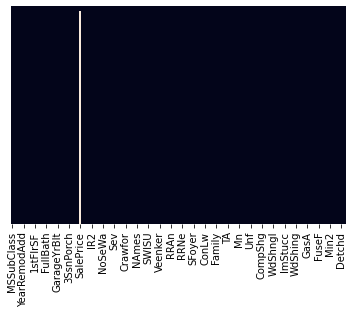

In [350]:
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False)

In [364]:
df_test.drop(['SalePrice'],axis=1,inplace=True)

In [365]:
y_train = df_train['SalePrice']
x_train = df_train.drop(['SalePrice'],axis=1)

In [366]:
import xgboost
classifier = xgboost.XGBRegressor()
classifier.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [367]:
import pickle
filename = 'finalised_model.pkl'
pickle.dump(classifier,open(filename,'wb'))


In [368]:
y_pred=classifier.predict(df_test)

In [369]:
y_pred

array([110743.74 ,  92378.516, 135444.28 , ..., 193397.38 , 106179.055,
       235668.05 ], dtype=float32)

In [371]:
len(y_pred)

1459

In [372]:
#XGboost without hyper parameter optimization
pred = pd.DataFrame(y_pred)
sub_fr = pd.read_csv('sample_submission.csv')
datasets = pd.concat([sub_fr['Id'],pred],axis=1)
datasets.columns = ['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False) 

In [374]:
# hyper parameter Optimization

n_estimators = [100,500,900,1100,1500] #number of decision trees
max_depth = [2,3,5,10,15]
booster = ['gbtree','gblinear']
learning_rate = [0.05,0.1,0.15,0.20]
min_child_weight = [1,2,3,4]
base_score = [0.25,0.5,0.75,1]

#define the grid of hyperparameter to search
hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    'min_child_weight': min_child_weight,
    'boosted': booster,
    'base_score': base_score
    
}


In [380]:
import xgboost
regressor = xgboost.XGBRegressor()

In [381]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=regressor, 
                               param_distributions=hyperparameter_grid, 
                               cv=5, n_iter=50,
                               scoring='neg_mean_absolute_error',n_jobs=4,
                               verbose = 5, return_train_score = True,
                               random_state=42)

In [392]:
pd.set_option('display.max_rows',90)
pd.set_option('display.max_columns',6)

In [393]:
x_train.head


<bound method NDFrame.head of       MSSubClass  LotFrontage  LotArea  ...  Detchd  RFn  P
0             60         65.0     8450  ...       0    1  0
1             20         80.0     9600  ...       0    1  0
2             60         68.0    11250  ...       0    1  0
3             70         60.0     9550  ...       1    0  0
4             60         84.0    14260  ...       0    1  0
...          ...          ...      ...  ...     ...  ... ..
1454          60         62.0     7917  ...       0    1  0
1455          20         85.0    13175  ...       0    0  0
1456          70         66.0     9042  ...       0    1  0
1457          20         68.0     9717  ...       0    0  0
1458          20         75.0     9937  ...       0    0  0

[1459 rows x 176 columns]>

In [394]:
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=4)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  10 tasks      | elapsed:  2.1min
[Parallel(n_jobs=4)]: Done  64 tasks      | elapsed:  7.8min
[Parallel(n_jobs=4)]: Done 154 tasks      | elapsed: 14.2min
[Parallel(n_jobs=4)]: Done 250 out of 250 | elapsed: 25.6min finished


[18:00:13] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosted } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, gamma=None,
                                          gpu_id=None, importance_type='gain',
                                          interaction_constraints=None,
                                          learning_rate=None,
                                          max_delta_step=None, max_depth=None,
                                          min_child_weight=None, missing=nan,
                                          monotone_constraints=None,
                                          n_estimators=100, n...
                                          validate_parameters=None,
                                          verbosity=None),
                   n_iter=50, n_jobs=4,
                   para

In [395]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, boosted='gbtree', booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=900, n_jobs=0,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [400]:
regressor = xgboost.XGBRegressor(base_score=0.25, boosted='gbtree', booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None,
             monotone_constraints='()', n_estimators=900, n_jobs=0,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [401]:
regressor.fit(x_train,y_train)

[21:49:40] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.2.0\src\learner.cc:516: 
Parameters: { boosted } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.




XGBRegressor(base_score=0.25, boosted='gbtree', booster='gbtree',
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             gamma=0, gpu_id=-1, importance_type='gain',
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=2, min_child_weight=1, missing=None,
             monotone_constraints='()', n_estimators=900, n_jobs=0,
             num_parallel_tree=1, random_state=0, reg_alpha=0, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [403]:
import pickle
filename = 'finalised_model.pkl'
pickle.dump(classifier,open(filename,'wb'))

In [404]:
#predict
y1_pred = regressor.predict(df_test)

In [405]:
y1_pred

array([108179.24,  83728.94, 131480.05, ..., 173385.8 , 120571.38,
       239823.77], dtype=float32)

In [410]:
#create submission file
pred1 = pd.DataFrame(y1_pred)
sub_df1 = pd.read_csv('sample_submission.csv')
datasets = pd.concat([sub_df1['Id'],pred1],axis=1)
datasets.columns = ['Id','SalePrice']
datasets.to_csv('sample_submission.csv',index=False)